In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt 

from povm_clf import *

---
# Circuit Diagrams

## State preparation circuit

In [47]:
test = SingleQubitPOVM(bloch_vec=[0.7,0,0])
@qml.qnode(qml.device('default.qubit', wires=2))
def circ_test():
    test.state_prepared_on_circuit(wires=[0,1]) #요거 그림 그려보기!
    return qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))

* Optimizing for preparing a mixed state ..............................
Target Bloch vector =  [0.7, 0, 0]
Output Bloch vector =  [0.64561231 0.00318949 0.00546764]


In [48]:
diagram = qml.draw(circ_test)
print(diagram())

 0: ──Rot(-0.162, 2.24, 0.701)──╭C──Rot(1.5, -1.4, 0.246)───╭┤ ⟨Z ⊗ Z⟩ 
 1: ──Rot(2.54, 3.54, 0.9)──────╰X──Rot(1.33, 1.83, -1.29)──╰┤ ⟨Z ⊗ Z⟩ 



## n-element POVM circuit

In [ ]:
n = 3
devs = [qml.device('default.qubit', wires=n), qml.device('default.qubit', wires=n)]
wires = [0, 1, 2]
bloch_vecs = [[0,0,0.7], [0,0,-0.7]]
params = 2 * np.pi * np.random.random([(3 + 8 * 2)])


@qml.qnode(devs[0])
def circ_test1(params, wires):
    state1_prepared(wires=[wires[0], wires[-1]])
    SingleQubitPOVM().first_U(params[:3], wire=wires[0])
    SingleQubitPOVM().two_element_povm(params[3:], wires=[wires[0],wires[1]])

    return qml.probs(wires=wires[1])

circ_test1(params=params, wires=wires)
print(circ_test1.draw())

---
# Pure-state Classifier

##  Two-element POVM

In [5]:
n = 2
dev = [qml.device('default.qubit', wires=n)] * n
wires = [0, 1]
bloch_vecs = [[1,0,0], [-1,0,0]]

In [6]:
classifier = POVM_clf(2, wires, bloch_vecs, dev)
Helstrom_bound = classifier.spectral_decomp()

In [7]:
cost_list = classifier.run_opt(steps=100)

Cost(init_params)    :  0.4760694
Cost after step    20:  0.1443643
Cost after step    40:  0.0021662
Cost after step    60:  0.0000320
Cost after step    80:  0.0000005
Cost after step   100:  0.0000000


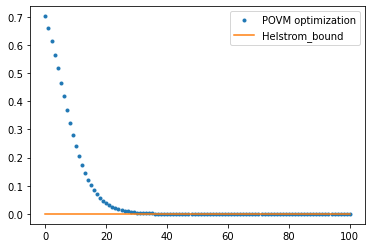

In [6]:
plt.plot(list(range(101)), cost_list, '.', label='POVM optimization')
plt.plot(list(range(101)), [Helstrom_bound]*101, '-', label="Helstrom_bound")
plt.legend()
plt.show()

In [36]:
E = classifier.povm()
rho = classifier.density_matrices
print(E)
rho

(tensor([[4.99999999e-01+0.j , 8.05675526e-11+0.5j],
        [8.05675526e-11-0.5j, 4.99999999e-01+0.j ]], requires_grad=True), tensor([[ 5.00000001e-01+0.j , -8.05675388e-11-0.5j],
        [-8.05675388e-11+0.5j,  5.00000001e-01+0.j ]], requires_grad=True))


[tensor([[ 0.5 +0.j       , -0.25-0.4330127j],
         [-0.25+0.4330127j,  0.5 +0.j       ]], requires_grad=True),
 tensor([[0.5+0.j, 0.5+0.j],
         [0.5+0.j, 0.5+0.j]], requires_grad=True),
 tensor([[ 0.5 +0.j       , -0.25+0.4330127j],
         [-0.25-0.4330127j,  0.5 +0.j       ]], requires_grad=True)]

## Three-element POVM

In [2]:
n = 3
dev = [qml.device('default.qubit', wires=n)] * n#, qml.device('default.qubit', wires=n), qml.device('default.qubit', wires=n)] 
wires = [0, 1, 2]

state_vecs = [[1/np.sqrt(2), np.exp(1j*2*np.pi/3)/np.sqrt(2)], [1/np.sqrt(2), 1/np.sqrt(2)], \
                [1/np.sqrt(2), np.exp(-1j*2*np.pi/3)/np.sqrt(2)]]
bloch_vecs = [state_2_bloch(state_vecs[i]) for i in range(n)]

In [3]:
classifier = POVM_clf(n, wires, bloch_vecs, dev)
#Helstrom_bound = classifier.spectral_decomp()

In [4]:
steps = 300
cost_list = classifier.run_opt(steps)

Cost(init_params)    :  0.6828178
Cost after step    20:  0.6227101
Cost after step    40:  0.4983709
Cost after step    60:  0.3998543
Cost after step    80:  0.3752633
Cost after step   100:  0.3648510
Cost after step   120:  0.3536371
Cost after step   140:  0.3431094
Cost after step   160:  0.3369534
Cost after step   180:  0.3344866
Cost after step   200:  0.3336768
Cost after step   220:  0.3334341
Cost after step   240:  0.3333639
Cost after step   260:  0.3333433
Cost after step   280:  0.3333370
Cost after step   300:  0.3333348


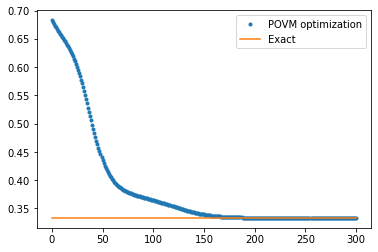

In [6]:
plt.plot(list(range(steps+1)), cost_list, '.', label='POVM optimization')
plt.plot(list(range(steps+1)), [1/3]*(steps+1), '-', label="Exact")
plt.legend()
plt.show()

In [5]:
K = classifier.kraus_op()
E = classifier.povm()
rho = classifier.density_matrices
E

(tensor([[ 0.33260787+0.j        , -0.16747059+0.28736775j],
         [-0.16747059-0.28736775j,  0.33260373+0.j        ]], requires_grad=True),
 tensor([[0.33472219+0.j        , 0.33472315+0.00020235j],
         [0.33472315-0.00020235j, 0.33472424+0.j        ]], requires_grad=True),
 tensor([[ 0.33266994+0.j       , -0.16725256-0.2875701j],
         [-0.16725256+0.2875701j,  0.33267202+0.j       ]], requires_grad=True))

Bloch Sphere visualization for both initial qubit and measurment direction

---
# Mixed-state Classifier

## Two-element POVM

In [2]:
n_qubit = 3
devs = [qml.device('default.qubit', wires=n_qubit), qml.device('default.qubit', wires=n_qubit)]
wires = [0, 1, 2]
bloch_vecs = [[0.1,0,0], [-0.1,0,0]]

In [15]:
classifier = POVM_clf(2, wires, bloch_vecs, devs)
Helstrom_bound_exact = classifier.spectral_decomp()
Helstrom_bound_noisy = classifier.spectral_decomp(types='noisy')

* Optimizing for preparing a mixed state ..............................
Target Bloch vector =  [0.1, 0, 0]
Output Bloch vector =  [ 0.09978642 -0.00117988  0.00086314]
* Optimizing for preparing a mixed state ..............................
Target Bloch vector =  [-0.1, 0, 0]
Output Bloch vector =  [-0.09954588 -0.00087344  0.00167904]


In [16]:
steps=400
cost_list = classifier.run_opt(steps)

Cost(init_params)    :  0.4846654
Cost after step    20:  0.4764075
Cost after step    40:  0.4687786
Cost after step    60:  0.4625925
Cost after step    80:  0.4581409
Cost after step   100:  0.4551962
Cost after step   120:  0.4533355
Cost after step   140:  0.4521787
Cost after step   160:  0.4514581
Cost after step   180:  0.4510044
Cost after step   200:  0.4507149
Cost after step   220:  0.4505279
Cost after step   240:  0.4504058
Cost after step   260:  0.4503256
Cost after step   280:  0.4502725
Cost after step   300:  0.4502372
Cost after step   320:  0.4502138
Cost after step   340:  0.4501981
Cost after step   360:  0.4501876
Cost after step   380:  0.4501806
Cost after step   400:  0.4501759


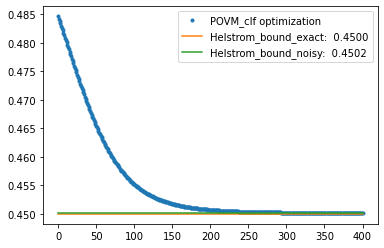

In [17]:
plt.plot(list(range(steps+1)), cost_list, '.', label='POVM_clf optimization')
plt.plot(list(range(steps+1)), [Helstrom_bound_exact]*(steps+1), '-', label="Helstrom_bound_exact: {: .4f}".format(Helstrom_bound_exact))
plt.plot(list(range(steps+1)), [Helstrom_bound_noisy]*(steps+1), '-', label="Helstrom_bound_noisy: {: .4f}".format(Helstrom_bound_noisy))
plt.legend()
plt.show()

In [18]:
K = classifier.kraus_op()
E = classifier.povm()
rho = classifier.density_matrices

In [20]:
1-(1/2)*sum([np.trace(np.dot(E[i], rho[i])) for i in range(2)])

(0.4500100161907854+0j)

## Three-element POVM

---
# For various purities $\mathcal{P}$,

$\hat{\rho} = \frac{1}{2}(I+\vec{a}\cdot\hat{\sigma})$ <br>
$
\mathcal{P} = Tr[\hat{\rho}^2] = \frac{1}{2}(1+|\vec{a}|^2) \Longrightarrow
|\vec{a}| = \sqrt{2\mathcal{P}-1}
$ 

## Case 1
$\vec{a}_1 = (\sqrt{2\mathcal{P}-1}, 0, 0)$  
$\vec{a}_2 = (-\sqrt{2\mathcal{P}-1}, 0, 0)$

In [ ]:
n_qubit = 3
wires = [0, 1, 2]
n_outcome = 2
devs = [qml.device('default.qubit', wires=n_qubit)] * n_outcome

cost_list, Hbe_list, Hbn_list = [], [], []
ampltd_abs = [1, 0.7, 0.4, 0.1]
#Pure state


#Mixed state
steps = [100, 150, 200, 400]
for i, a in enumerate(ampltd_abs):
    
    bloch_vecs = [[a,0,0], [(-1)*a,0,0]]
    if a == 1:
        classifier =POVM_clf(2, wires[:2], bloch_vecs, devs[:2])
        cost_list.append(classifier.run_opt(steps[i]))
        Hbe_list.append(classifier.spectral_decomp())
        Hbn_list.append(classifier.spectral_decomp())

    else:
        classifier = POVM_clf(2, wires, bloch_vecs, devs)
        Hbe_list.append(classifier.spectral_decomp())
        Hbn_list.append(classifier.spectral_decomp(types='noisy'))

        cost_list.append(classifier.run_opt(steps[i]))

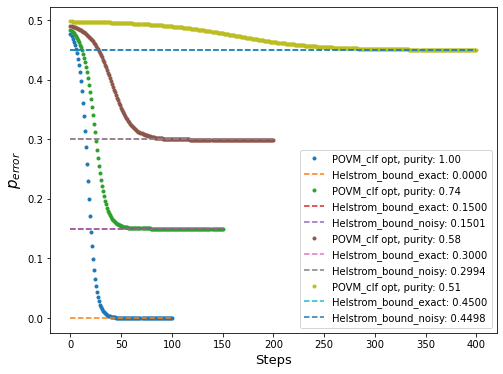

In [14]:
plt.figure(figsize=(8,6))
for i in range(len(cost_list)):
    plt.plot(list(range(steps[i]+1)), cost_list[i], '.', label="POVM_clf opt, purity:{: .2f}".format((ampltd_abs[i]**2+1)/2))
    plt.plot(list(range(steps[i]+1)), [Hbe_list[i]]*(steps[i]+1), '--', label="Helstrom_bound_exact: {:.4f}".format(Hbe_list[i]))
    if i !=0:
        plt.plot(list(range(steps[i]+1)), [Hbe_list[i]]*(steps[i]+1), '--', label="Helstrom_bound_noisy: {:.4f}".format(Hbn_list[i]))

plt.xlabel('Steps', fontsize=13)
plt.ylabel(r'$p_{error}$', fontsize=15)
plt.legend()
plt.savefig('result1.png', bbox_inches='tight', transparent=True)
plt.show()

## Case 2
$\vec{a}_1 = (\sqrt{2\mathcal{P}-1}, 0, 0)$  
$\vec{a}_2 = (0, 0, \sqrt{2\mathcal{P}-1})$

In [ ]:
n_qubit = 3
wires = [0, 1, 2]
n_outcome = 2
devs = [qml.device('default.qubit', wires=n_qubit)] * n_outcome

cost_list, Hbe_list, Hbn_list = [], [], []
ampltd_abs = [1, 0.7, 0.4, 0.1]
#Pure state


#Mixed state
steps = [130, 170, 250, 650]
for i, a in enumerate(ampltd_abs):
    
    bloch_vecs = [[a,0,0], [0,0,a]]
    if a == 1:
        classifier =POVM_clf(2, wires[:2], bloch_vecs, devs[:2])
        cost_list.append(classifier.run_opt(steps[i]))
        Hbe_list.append(classifier.spectral_decomp())
        Hbn_list.append(classifier.spectral_decomp())

    else:
        classifier = POVM_clf(2, wires, bloch_vecs, devs)
        Hbe_list.append(classifier.spectral_decomp())
        Hbn_list.append(classifier.spectral_decomp(types='noisy'))

        cost_list.append(classifier.run_opt(steps[i]))

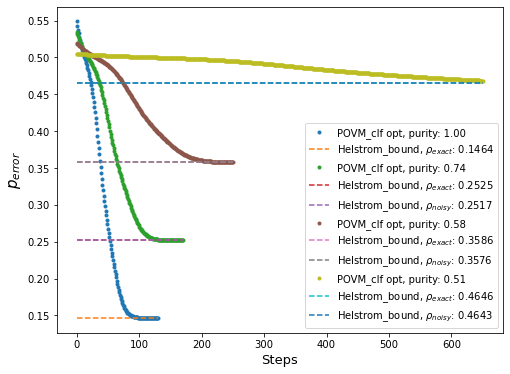

In [25]:
plt.figure(figsize=(8,6))
for i in range(len(cost_list)):
    plt.plot(list(range(steps[i]+1)), cost_list[i], '.', label="POVM_clf opt, purity:{: .2f}".format((ampltd_abs[i]**2+1)/2))
    plt.plot(list(range(steps[i]+1)), [Hbe_list[i]]*(steps[i]+1), '--', label="Helstrom_bound, "+r"$\rho_{exact}$"+": {:.4f}".format(Hbe_list[i]))
    if i !=0:
        plt.plot(list(range(steps[i]+1)), [Hbe_list[i]]*(steps[i]+1), '--', label="Helstrom_bound, "+r"$\rho_{noisy}$"+": {:.4f}".format(Hbn_list[i]))

plt.xlabel('Steps', fontsize=13)
plt.ylabel(r'$p_{error}$', fontsize=15)
plt.legend()
plt.savefig('result2.png', bbox_inches='tight', transparent=True)
plt.show()

그래프 조금 더 다듬기

---
---
---
# Test

In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt 

from povm_clf import *

In [2]:
n = 3
dev = [qml.device('default.qubit', wires=n)] * n#, qml.device('default.qubit', wires=n), qml.device('default.qubit', wires=n)] 
wires = [0, 1, 2]

state_vecs = [[1/np.sqrt(2), np.exp(1j*2*np.pi/3)/np.sqrt(2)], [1/np.sqrt(2), 1/np.sqrt(2)], \
                [1/np.sqrt(2), np.exp(-1j*2*np.pi/3)/np.sqrt(2)]]
bloch_vecs = [state_2_bloch(state_vecs[i]) for i in range(n)] 

In [3]:
np.random.seed(2)
params = 4 * np.pi * np.random.random([19])
params

tensor([ 5.47887353,  0.32579864,  6.90726241,  5.47042252,  5.2824976 ,
         4.15110979,  2.57169058,  7.78198847,  3.76557169,  3.35305043,
         7.80539794,  6.64939566,  1.69118147,  6.45381301,  2.31773971,
         9.86881252, 10.73137002,  6.21076327, 10.63820537], requires_grad=True)

In [8]:
params_opt = np.array([2.07716568, 7.85397763, 0.5236459 , 3.14159269, 1.23291917,
        1.59793933, 7.49892272, 2.84015056, 1.0471506 , 1.59700472,
        4.39604675, 6.28317501, 3.14158859, 8.04758825, 6.07043459,
        6.34899187, 4.86183644, 9.97314239, 7.28854747])
classifier = POVM_clf(n, wires, bloch_vecs, dev)
classifier.cost_fn(params), classifier.cost_fn(params_opt)

[8.18281620e-01 4.81482486e-35 1.22542914e-01 5.91754651e-02]
[7.98603265e-01 2.04630057e-34 1.52876822e-01 4.85199128e-02]
[8.03528796e-01 4.81952684e-35 1.60807782e-01 3.56634215e-02]


(0.6617490587001609, 0.4986002199858599)

In [9]:
classifier.povm_params

tensor([ 5.47887353,  0.32579864,  6.90726241,  5.47042252,  5.2824976 ,
         4.15110979,  2.57169058,  7.78198847,  3.76557169,  3.35305043,
         7.80539794,  6.64939566,  1.69118147,  6.45381301,  2.31773971,
         9.86881252, 10.73137002,  6.21076327, 10.63820537], requires_grad=True)

In [6]:
qnodes = qml.QNodeCollection()
for i in range(3):
    povm_circ = SingleQubitPOVM(n=3, bloch_vec = bloch_vecs[i])
    qnode = povm_circ(wires=wires, dev=dev[i])
    qnodes.append(qnode)
probs_povm = qnodes(params)
probs_povm

array([[8.18281620e-01, 4.81482486e-35, 1.22542914e-01, 5.91754651e-02],
       [7.98603265e-01, 2.04630057e-34, 1.52876822e-01, 4.85199128e-02],
       [8.03528796e-01, 4.81952684e-35, 1.60807782e-01, 3.56634215e-02]])

In [8]:
print(probs_povm[0][0], probs_povm[1][2], probs_povm[2][3])

0.818281620388223 0.15287682182133314 0.035663421536471875


---
---
---